1. Create different 3D magma grid file (lon, lat, dep, dvp, dvs, rho)

Later, use Magma_3D/plot_project_magma.csh [circle_point] to plot the crosssection 
and create ~.sph file for axisem.

middle of the circle : 25.21, 121.623 , 30.



13534


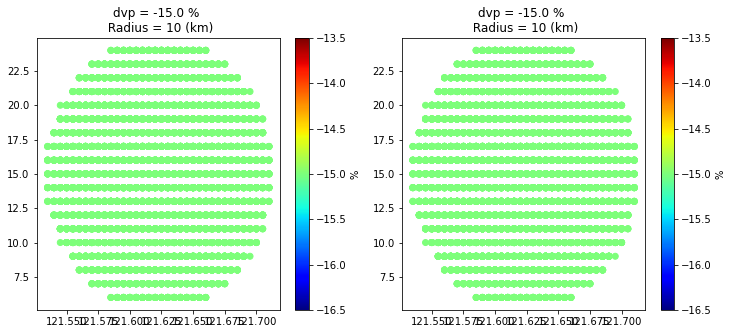

In [2]:
import numpy as np
import matplotlib.pyplot as plt


num = 100
#theta_num = np.arange(0,111,1) #theta (km)
lat_num = np.arange(25, 25.37, 0.005)*111
lon_num = np.arange(121.35, 121.9, 0.005)*111
dep_num = np.arange(0,50,1)  #depth (km)

mag_dep = 15
z_per  = -15.
zv_per = -15.
radius = 10
circle_lat, circle_lon, circle_dep = 25.21*111, 121.623*111, mag_dep

x_lon = []
y_lat = []
z_dep = []
dvp = []
dvs = []

#lat_num = [25.2*111]
for lat in lat_num:
    for lon in lon_num:
        for dep in dep_num:
            #plt.plot(theta, dep,'b.')
            dis = ((circle_lat - lat)**2+(circle_lon - lon)**2+(circle_dep - dep)**2)**(0.5)

            #print(dis)
            z = 0.
            if (dis < radius ):
                z = z_per
                zv = zv_per
                #cos_tap = 0.5 * (1 + np.cos(2*np.pi*dis/(radius*2)))
                #z = z_per * cos_tap
                #zv = zv_per * cos_tap

                x_lon.append(lon/111)
                y_lat.append(lat/111)
                z_dep.append(dep)
                dvp.append(z)
                dvs.append(zv)
                #print(dis, cos_tap,z)

print(len(dvp))
fp = open('r_%s_d_%s_dvp_%s_dvs_%s'%(radius,mag_dep, z_per, zv_per),'w')
#fp = open('rcos_%s_d_%s_dvp_%s_dvs_%s'%(radius,mag_dep, z_per, zv_per),'w')

#fp.write('lon lat dep dvp dvs rho\n')
for i in range(len(dvp)):
    #fp.write(("%6.1f %6.2f %6.2f %6.2f 0.0\n")%(6371.-y_dep[i], x_the[i]/111., dv[i], dv[i]))
    fp.write('%6.2f  %5.2f  %4.1f %6.2f  %6.2f  0.0\n'%(x_lon[i], y_lat[i], z_dep[i],dvp[i],dvs[i]))
fp.close()

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_lon ,z_dep,c=dvp,cmap='jet')
plt.colorbar(label='%')
plt.title('dvp = %s %% \n Radius = %s (km)'%(z_per, radius))
#plt.axis('scaled')

plt.subplot(1,2,2)
plt.scatter(x_lon ,z_dep,c=dvs,cmap='jet')
plt.colorbar(label='%')
plt.title('dvp = %s %% \n Radius = %s (km)'%(z_per, radius))
#plt.axis('scaled')


plt.show()

In [ ]:
#fp = open('magma.sph','w')

#fp.write(('%s\n')%(len(dv)))
#for i in range(len(dv)):
#    fp.write(("%6.1f %6.2f %6.2f %6.2f 0.0\n")%(6371.-y_dep[i], x_the[i]/111., dv[i], dv[i]))
#fp.close()

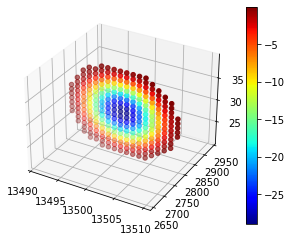

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#[x,y,z]=np.meshgrid(x_lon,y_lat,z_dep)
[X,Y,Z]=np.meshgrid(lon_num,lat_num,dep_num)

mappable = ax.scatter(x_lon, y_lat, z_dep, c=dv, cmap='jet')
fig.colorbar(mappable, ax=ax)

#plt.axis('equal')
#plt.show()

112


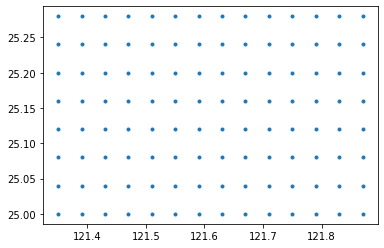

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lat_num = np.arange(25, 25.3, 0.04)
lon_num = np.arange(121.35, 121.9, 0.04)
slon, slat = [],[]
for lat in lat_num:
    for lon in lon_num:
        #print(lon,lat)
        slon.append(lon)
        slat.append(lat)

fp = open('STATIONS_FAKE','w')

for i in range(len(slat)):
    fp.write(("Y%.3d       YY       %7.4f     %8.4f  0.0    0.0\n")%(i,slat[i],slon[i]))
fp.close()

print(len(slon))
plt.plot(slon, slat,'.')
plt.show()


magma_cos_dvp_-30.0_dvs_-100.0.sph
144


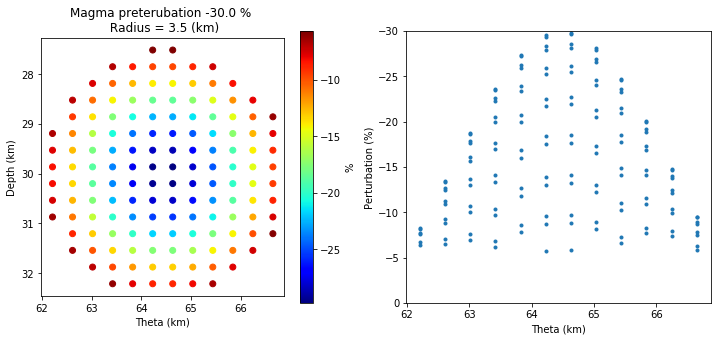

In [9]:
import numpy as np
import matplotlib.pyplot as plt
num = 150
theta_num = np.linspace(30,90,num) #theta
dep_num = np.linspace(0,50,num)  #
circle_theta, circle_dep = 64.48 , 30. 
z_per = -30.
z2_per = -100.
radius = 3.5


x_the = []
y_dep = []
dv = []
dvs = []

for theta in theta_num:
    for dep in dep_num:
        #plt.plot(theta, dep,'b.')
        dis = ((circle_theta - theta)**2+(circle_dep - dep)**2)**(0.5)
        z = 0.
        if (dis < radius-1 ):      # dont want dv = -0.0
            cos_tap = 0.5 * (1 + np.cos(2*np.pi*dis/(radius*2)))
            z = z_per * cos_tap 
            z2 = z2_per * cos_tap
            x_the.append(theta)
            y_dep.append(dep)
            dv.append(z)
            dvs.append(z2)
            #print(dis, cos_tap,z)

vp_per = z_per
vs_per = z2_per
print('magma_cos_dvp_%s_dvs_%s.sph'%(vp_per, vs_per))
fp = open('magma_cos_dvp_%s_dvs_%s.sph'%(vp_per, vs_per),'w')
#fp = open('magma_%s.sph'%(vp_per),'w')
print(len(dv))
fp.write(('%s\n')%(len(dv)))
for i in range(len(dv)):
    #fp.write(("%6.1f %6.2f %6.2f %6.2f 0.0\n")%(6371.-y_dep[i], x_the[i]/111., dv[i], dv[i]))
    fp.write(("%6.1f %6.2f %6.2f %6.2f 0.0\n")%(6371.-y_dep[i], x_the[i]/111., dv[i], dvs[i]))     
fp.close()

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_the,y_dep,c=dv,cmap='jet')
plt.colorbar(label='%')
plt.xlabel('Theta (km)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()
plt.title('Magma preterubation %s %% \n Radius = %s (km)'%(z_per, radius))
plt.axis('scaled')

plt.subplot(1,2,2)
plt.plot(x_the, dv, '.')
plt.xlabel('Theta (km)')
plt.ylabel('Perturbation (%)')
plt.gca().invert_yaxis()
plt.ylim(0,-30)
plt.savefig('magma_profile_costap.png')
plt.show()

[0.         0.01635257 0.06434065 0.14082532 0.24080372 0.35773621
 0.48397421 0.61126047 0.73126915 0.83615045 0.91904405 0.97452787
 0.9989727  0.99077958 0.95048443 0.88072298 0.78605833 0.67268253
 0.54801151 0.42020005 0.29760833 0.1882551  0.09929319 0.03654162
 0.00410499 0.00410499 0.03654162 0.09929319 0.1882551  0.29760833
 0.42020005 0.54801151 0.67268253 0.78605833 0.88072298 0.95048443
 0.99077958 0.9989727  0.97452787 0.91904405 0.83615045 0.73126915
 0.61126047 0.48397421 0.35773621 0.24080372 0.14082532 0.06434065
 0.01635257 0.        ]


True

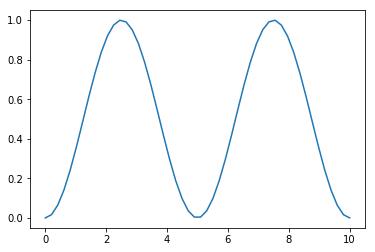

In [42]:
from obspy.signal.invsim import cosine_taper
tap = cosine_taper(100, 1.0)

t = np.linspace(0,1,50)
tap2 = 0.5 * (1 + np.cos(np.linspace(np.pi, 2 * np.pi, 50))) # 50 point

r = 5  #diameter
x = np.linspace(0,10,50)


tap3 = 0.5 * (1 - np.cos(2*np.pi*x/r))
print(tap3)
plt.plot(x,tap3)
#plt.plot(t,tap2)
np.allclose(tap[0:50], tap2)


2. melt magma test 

vp = -19% ; vs = -33% 

middle of the circle : 25.21, 121.623 , 30.

13534


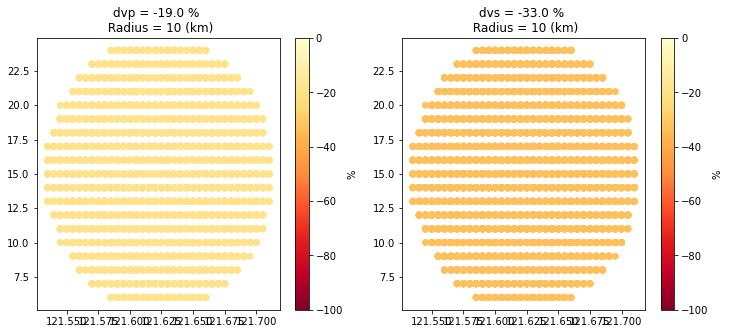

In [12]:
import numpy as np
import matplotlib.pyplot as plt


num = 100
#theta_num = np.arange(0,111,1) #theta (km)
lat_num = np.arange(25, 25.37, 0.005)*111
lon_num = np.arange(121.35, 121.9, 0.005)*111
dep_num = np.arange(0,50,1)  #depth (km)

mag_dep = 15
z_per  = -19.
zv_per = -33.
radius = 10
circle_lat, circle_lon, circle_dep = 25.21*111, 121.623*111, mag_dep

x_lon = []
y_lat = []
z_dep = []
dvp = []
dvs = []

#lat_num = [25.2*111]
for lat in lat_num:
    for lon in lon_num:
        for dep in dep_num:
            #plt.plot(theta, dep,'b.')
            dis = ((circle_lat - lat)**2+(circle_lon - lon)**2+(circle_dep - dep)**2)**(0.5)

            #print(dis)
            z = 0.
            if (dis < radius ):
                z = z_per
                zv = zv_per
                #cos_tap = 0.5 * (1 + np.cos(2*np.pi*dis/(radius*2)))
                #z = z_per * cos_tap
                #zv = zv_per * cos_tap

                x_lon.append(lon/111)
                y_lat.append(lat/111)
                z_dep.append(dep)
                dvp.append(z)
                dvs.append(zv)
                #print(dis, cos_tap,z)

print(len(dvp))
fp = open('r_%s_d_%s_dvp_%s_dvs_%s'%(radius,mag_dep, z_per, zv_per),'w')
#fp = open('rcos_%s_d_%s_dvp_%s_dvs_%s'%(radius,mag_dep, z_per, zv_per),'w')

#fp.write('lon lat dep dvp dvs rho\n')
for i in range(len(dvp)):
    #fp.write(("%6.1f %6.2f %6.2f %6.2f 0.0\n")%(6371.-y_dep[i], x_the[i]/111., dv[i], dv[i]))
    fp.write('%6.2f  %5.2f  %4.1f %6.2f  %6.2f  0.0\n'%(x_lon[i], y_lat[i], z_dep[i],dvp[i],dvs[i]))
fp.close()

plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x_lon ,z_dep,c=dvp,cmap='YlOrRd_r',vmin=-100,vmax=0)
plt.colorbar(label='%')
plt.title('dvp = %s %% \n Radius = %s (km)'%(z_per, radius))
#plt.axis('scaled')

plt.subplot(1,2,2)
plt.scatter(x_lon ,z_dep,c=dvs, cmap='YlOrRd_r',vmin=-100,vmax=0)
plt.colorbar(label='%')
plt.title('dvs = %s %% \n Radius = %s (km)'%(zv_per, radius))
#plt.axis('scaled')

plt.savfig('dvp_%s_')
plt.show()